# General Python Technical Exercise

<span style="color:red">NB. My written answers are in red. I have put all my solutions in one notebook, but each question I treat seperately and could be a py file</span>.

<span style="color:blue"> 1.) A population of U users receives N notifications at specific times during the day. You are given, to represent who receives a notification and when, a CSV containing a list of pairs (user, notification_time). The similarity between users is defined as "how close in time they tend to receive notifications". As an example, if user A and user B both receive lots of notifications around 12:00 and not much during the rest of the day, they have high mutual similarity. If user C receives most notifications spread over the evening and not much around 12:00 he has low similarity to both user A and B. Please explain how you could quantify similarity(user1, user2) mathematically and implement a program that, given the attached CSV, will find the two most similar users. 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats
from itertools import combinations
import matplotlib.pyplot as plt
import pylab

In [2]:
pairs = pd.read_csv('testdata_exercise1.csv',names=['user','notification_time'])

In [3]:
# Function to convert the notification time in raw second count.
def get_elapsed_seconds(time):
    return dt.timedelta(hours=time.hour,minutes=time.minute,seconds=time.second).total_seconds()

In [4]:
# seconds column, is the elapsed seconds from 00:00, so I can easily apply statistics 

In [5]:
pairs['seconds'] = pd.to_datetime(pairs['notification_time']).apply(get_elapsed_seconds)
pairs['notification_time'] = pd.to_datetime(pairs['notification_time']).apply(lambda x: x.time().strftime('%H:%M:%S'))

In [6]:
pairs.groupby('user')['seconds'].agg(['count', 'mean', 'std', 'min','max',np.ptp])

,count,mean,std,min,max,ptp
user,,,,,,
user0,32,46163.593750,21847.672163,12772.0,79975.0,67203.0
user1,83,45997.216867,23062.429964,1437.0,85926.0,84489.0
user2,51,50000.372549,21690.133074,7581.0,75550.0,67969.0
user3,66,49355.651515,26693.715405,1793.0,86323.0,84530.0
user4,78,46839.525641,21632.994060,1202.0,84255.0,83053.0
user5,40,35599.800000,29682.511011,253.0,84155.0,83902.0
user6,49,46016.265306,8671.366280,32464.0,60839.0,28375.0
user7,102,46031.794118,8424.976362,32405.0,61061.0,28656.0


<span style="color:red"> Rough inspection: Number of notifications, $N_{i}$ for each user, $U_{i},i\in \left[ 0,7\right] $

<span style="color:blue"> Please explain how you could quantify similarity(user1, user2) mathematically

<span style="color:red"> The number of notifications varies per user but from the question, the similarity metric should be independent as $N_{i}$ is large enough for each user to see the distribution of notifications in the day. A non-parametric measure of similarity of the distributions would be suitable, the Kolmogorov–Smirnov test can be used to test whether two underlying one-dimensional probability distributions differ.

<span style="color:blue"> Implement a program that, given the attached CSV, will find the two most similar users.

In [7]:
# Use scipy.stats, to get the p-value of the K-S test, ie. how likely it is that the two notification time 
#samples are from the same distribution ~ how similar they are

In [8]:
def similarity_measure(
    userA, userB): return scipy.stats.ks_2samp(userA, userB)[1] # returns p-value

In [9]:
# Values gets the list of notifications for each user, ie. the distribution

In [10]:
def Values(user): return pairs.groupby('user').get_group(
    '{}'.format(user))['seconds'].values

In [11]:
Users = pairs['user'].unique() # list of all users

In [12]:
user_pairs = combinations(Users,2) # list of all possible user pairs

In [13]:
user_pair_dict = {i: similarity_measure(Values(i[0]),Values(i[1])) for i in user_pairs}


In [14]:
sorted(user_pair_dict.items(), key=lambda kv: kv[1])

[(('user3', 'user7'), 1.9296828887186487e-08),
 (('user5', 'user7'), 2.242010475143417e-08),
 (('user5', 'user6'), 1.4306347262211553e-06),
 (('user2', 'user7'), 3.4736033588049373e-06),
 (('user3', 'user6'), 4.1917406036764854e-06),
 (('user2', 'user6'), 0.00010695160633172764),
 (('user4', 'user7'), 0.0005210204171964238),
 (('user4', 'user3'), 0.001143286432387774),
 (('user1', 'user7'), 0.0013322291300105833),
 (('user4', 'user5'), 0.0016635845314886537),
 (('user3', 'user1'), 0.007124979407744059),
 (('user1', 'user5'), 0.008145579808033179),
 (('user5', 'user2'), 0.011091186401535892),
 (('user0', 'user7'), 0.013002861307768409),
 (('user4', 'user2'), 0.01357844352487465),
 (('user1', 'user6'), 0.013841664111175373),
 (('user0', 'user5'), 0.01888361697988046),
 (('user4', 'user6'), 0.023022927785779034),
 (('user0', 'user6'), 0.03540021774698285),
 (('user3', 'user5'), 0.05029152431972048),
 (('user1', 'user2'), 0.07273026728807018),
 (('user3', 'user0'), 0.10928562077191598),
 (

In [15]:
#user 4 & user 1 are most similar

In [16]:
# Sense Check

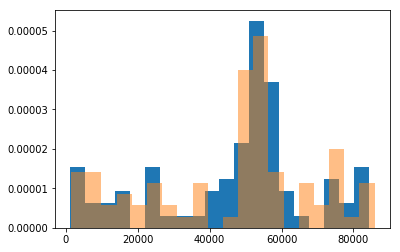

In [17]:
fig, axs = plt.subplots() # most similar by K-S test
axs.hist(list(Values('user4')), bins=20,density=True)
axs.hist(list(Values('user1')), bins=20,density=True,alpha=0.5);

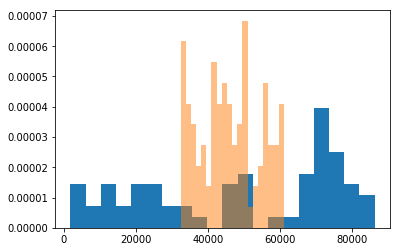

In [18]:
fig, axs = plt.subplots() # least similar user pair by the K-S test's reckoning
axs.hist(list(Values('user3')), bins=20,density=True)
axs.hist(list(Values('user7')), bins=20,density=True,alpha=0.5);

In [19]:
# or even better Q-Q plot, accounting for different sample sizes. Code taken from stackexchange.

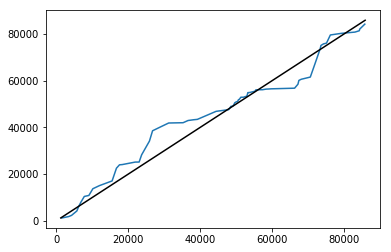

In [20]:
user1 = list(Values('user1'))
user2 = list(Values('user4'))
user1.sort()
quantile_levels1 = np.arange(len(user1),dtype=float)/len(user1)

user2.sort()
quantile_levels2 = np.arange(len(user2),dtype=float)/len(user2)

quantile_levels = quantile_levels2

quantiles2 = user2


quantiles1 = np.interp(quantile_levels,quantile_levels1,user1)


pylab.plot(quantiles1,quantiles2)
maxval = max(user1[-1],user2[-1])
minval = min(user1[0],user2[0])
pylab.plot([minval,maxval],[minval,maxval],'k-')

pylab.show()

In [21]:
# Complete program:

In [22]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy
from itertools import combinations


def get_elapsed_seconds(time):
    return dt.timedelta(hours=time.hour, minutes=time.minute, seconds=time.second).total_seconds()


def similarity_measure(
    userA, userB): return scipy.stats.ks_2samp(userA, userB)[1]


def Values(user): return pairs.groupby('user').get_group(
    '{}'.format(user))['seconds'].values


def find_two_most_similar_users(csv_path): # given the csv , this will find the two most similar users
    pairs = pd.read_csv(csv_path, names=['user', 'notification_time'])
    pairs['seconds'] = pd.to_datetime(
        pairs['notification_time']).apply(get_elapsed_seconds)
    Users = pairs['user'].unique()
    user_pairs = combinations(Users, 2)
    user_pair_dict = {i: similarity_measure(
        Values(i[0]), Values(i[1])) for i in user_pairs}
    return sorted(user_pair_dict.items(), key=lambda kv: kv[1])[-1]


find_two_most_similar_users('testdata_exercise1.csv')

(('user4', 'user1'), 0.9461886891993565)

<span style="color:blue"> 2.) A population of U users receives N notifications a day. You are given the data in a simple CSV file (attached) containing a list of pairs (user, notifications_per_day). Please write a program that implements an algorithm to sort the users by "notifications in a day". However, let's say you have limited RAM, so you are not allowed to work on more than 3 users at a time. For the sake of parsing simplicity, you are allowed to load the whole CSV in RAM, but the sorting cannot work on more than 3 users at a time. 

<span style="color:red"> A Simple Insertion sort solves the problem: It only requires $\mathcal{O}(1)$ of additional memory space. Only two users are ever worked on at one time


In [23]:
import csv

In [24]:
with open('testdata_exercise2.csv', 'r') as f:
    loaded_csv = [[row[0],int(row[1])] for row in csv.reader(f)] # loading the whole csv, storing each notification count as an int

In [25]:
for i in range(1, len(loaded_csv)):   # Standard insertion sort
    j = i
    temporary = loaded_csv[j]
    while j > 0 and temporary[1] < loaded_csv[j-1][1]:
        loaded_csv[j] = loaded_csv[j-1]
        j = j-1
    loaded_csv[j] = temporary

In [26]:
# loaded_csv is now sorted

In [27]:
loaded_csv

[['user162', 0],
 ['user411', 1],
 ['user298', 2],
 ['user427', 2],
 ['user027', 3],
 ['user076', 3],
 ['user282', 4],
 ['user009', 5],
 ['user094', 5],
 ['user109', 5],
 ['user142', 6],
 ['user248', 7],
 ['user294', 8],
 ['user014', 9],
 ['user466', 9],
 ['user260', 10],
 ['user281', 10],
 ['user218', 11],
 ['user119', 12],
 ['user200', 12],
 ['user021', 14],
 ['user426', 14],
 ['user456', 14],
 ['user366', 15],
 ['user098', 16],
 ['user100', 16],
 ['user413', 16],
 ['user018', 17],
 ['user161', 18],
 ['user219', 18],
 ['user238', 18],
 ['user245', 18],
 ['user287', 19],
 ['user295', 19],
 ['user296', 20],
 ['user440', 20],
 ['user050', 21],
 ['user099', 21],
 ['user157', 21],
 ['user173', 21],
 ['user095', 22],
 ['user172', 22],
 ['user201', 23],
 ['user223', 23],
 ['user395', 23],
 ['user032', 24],
 ['user186', 24],
 ['user213', 24],
 ['user397', 25],
 ['user016', 27],
 ['user034', 27],
 ['user165', 28],
 ['user070', 29],
 ['user289', 29],
 ['user117', 30],
 ['user065', 31],
 ['user

In [28]:
# If desired one can write the sorted output as a csv
with open('ordered_testdata_exercise2.csv', 'w', newline="") as f:
    writer = csv.writer(f)
    writer.writerows(loaded_csv)

<span style="color:red"> Extra: One can build the sorted users without loading the CSV in RAM. Use a generator, and build the sorted new list by comparing each newly generated value with the current sorted list and then insert in the appropriate position. Like so:


In [29]:
with open('testdata_exercise2.csv', 'r') as f:
    whole_csv = csv.reader(f)  # Generator
    def sort(whole_csv,current): # current, is the current sorted list being built up
        new = next(whole_csv,'end') # Next generated value, until the end
        if new == 'end': return current  # once at the end, the built-up list is a sorted version of the used generator
        for i,j in enumerate(current):
            if int(new[1]) <= int(j[1]): 
                current.insert(i, new)    #insert the next value, into the correct position, 
                return sort(whole_csv,current) # turn to the next generated value
        current += [new]                       # if the generated value is greater than all elements, put it at the end
        return sort(whole_csv,current)
    sorted_users = sort(whole_csv,[next(whole_csv)]) # start with current = [first generated value]
sorted_users

[['user162', '0'],
 ['user411', '1'],
 ['user427', '2'],
 ['user298', '2'],
 ['user076', '3'],
 ['user027', '3'],
 ['user282', '4'],
 ['user109', '5'],
 ['user094', '5'],
 ['user009', '5'],
 ['user142', '6'],
 ['user248', '7'],
 ['user294', '8'],
 ['user466', '9'],
 ['user014', '9'],
 ['user281', '10'],
 ['user260', '10'],
 ['user218', '11'],
 ['user200', '12'],
 ['user119', '12'],
 ['user456', '14'],
 ['user426', '14'],
 ['user021', '14'],
 ['user366', '15'],
 ['user413', '16'],
 ['user100', '16'],
 ['user098', '16'],
 ['user018', '17'],
 ['user245', '18'],
 ['user238', '18'],
 ['user219', '18'],
 ['user161', '18'],
 ['user295', '19'],
 ['user287', '19'],
 ['user440', '20'],
 ['user296', '20'],
 ['user173', '21'],
 ['user157', '21'],
 ['user099', '21'],
 ['user050', '21'],
 ['user172', '22'],
 ['user095', '22'],
 ['user395', '23'],
 ['user223', '23'],
 ['user201', '23'],
 ['user213', '24'],
 ['user186', '24'],
 ['user032', '24'],
 ['user397', '25'],
 ['user034', '27'],
 ['user016', '2

<span style="color:blue"> 3.) A population of U users receives N notifications a day. You are given the data in a simple CSV file (attached) containing a list of pairs (user, notifications_per_day). Please write a program that implements the optimal  algorithm to find the user that receives the second highest number of notifications in a day.

In [30]:
import pandas as pd
import csv

In [31]:
pairs3 = pd.read_csv('testdata_exercise3.csv',names=['user', 'notifications_per_day'])

In [32]:
pairs3.sort_values('notifications_per_day', ascending=False).head(7)

# There are 4 users with the second highest number
# I am unsure about which user the algorithm should return for this data set, as there are multiple users, but I will take it to mean
# returning any of the users with the second highest number of notifications. So any user of
# Users 156,343,116,200 in this case

,user,notifications_per_day
144,user144,299
456,user456,299
156,user156,298
343,user343,298
116,user116,298
200,user200,298
84,user084,297


In [33]:
with open('testdata_exercise3.csv', 'r') as f:
    whole_csv = [[row[0],int(row[1])] for row in csv.reader(f)] # storing as [user,value] pairs

In [34]:
def second_largest(whole_csv):
    first = second = [0,0]  # Compare every user once and keep track of the current first and second highest, 
    for n in whole_csv:     # iterating through each user of the complete list once.
        if n[1] > first[1]:    # replacing first if user n has a count higher than first
            first, second = n, first  
        elif first[1] > n[1] > second[1]: # replacing second if user n has a higher count than second but lower than first
            second = n
    return second

In [35]:
second_largest(whole_csv) 

['user116', 298]

<span style="color:red"> There has to be one pass, as every user must be considered once, so the optimum algorithm will 
be $\mathcal{O}(n)$

<span style="color:red">  Again, I can calculate, without actually loading the csv in RAM

In [36]:
with open('testdata_exercise2.csv', 'r') as f:
    whole_csv = csv.reader(f)
    def second_largest(whole_csv,first,second):
        n = next(whole_csv,'end')
        if n == 'end': 
            return second
        n[1] = int(n[1])
        if n[1] > first[1]:
            first, second = n, first
        elif first[1] > n[1] > second[1]:
            second = n
        return second_largest(whole_csv,first,second)
    second = second_largest(whole_csv,[0,0],[0,0])
second

['user215', 298]